<a href="https://colab.research.google.com/github/wacosta86/talento_tech_data_analyst_integrator/blob/main/Proyecto_final_talento_tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El cambio climático es uno de los problemas más apremiantes que enfrenta el planeta en la actualidad. La temperatura promedio de la Tierra ha aumentado durante el último siglo, principalmente debido a actividades humanas como la quema de combustibles fósiles. Este aumento de temperatura está teniendo un impacto significativo en el sistema climático del planeta, lo que lleva a cambios en los patrones climáticos, el aumento del nivel del mar y eventos climáticos más extremos.

En este proyecto, analizaremos las temperaturas terrestres globales por país para comprender las tendencias y patrones de cambio de temperatura a lo largo del tiempo. Utilizaremos datos del conjunto de datos de Temperaturas Terrestres Globales por País, que proporciona promedios mensuales de temperatura para un gran número de países de 1743 a 2020.

Dataset tomado de: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

Enlace video de presentación: https://youtu.be/u4UfWfynLLk

### **Exploración inicial**

Importar librerías y cargar el dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset CSV en un DataFrame de Pandas
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")



1.   Se importan las librerías necesarias para el análisis:
  *   pandas para manipulación de datos.
  *   numpy para operaciones matemáticas.
  *   matplotlib.pyplot para crear visualizaciones.
  
2.   Se carga el archivo CSV "GlobalLandTemperaturesByCountry.csv" en un DataFrame de Pandas llamado df.






Examinar la estructura del DataFrame

In [ ]:
# Información general del DataFrame
print(df.info())

# Visualizar las primeras cinco filas del DataFrame
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB
None
           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland




1.   Se utiliza df.info() para obtener información general del DataFrame, como el número de filas, columnas, tipos de datos y valores nulos.

2.   Se utiliza df.head() para mostrar las primeras cinco filas del DataFrame, permitiendo observar una muestra representativa de los datos.





Análisis descriptivo de las variables

       AverageTemperature  AverageTemperatureUncertainty
count       544811.000000                  545550.000000
mean            17.193354                       1.019057
std             10.953966                       1.201930
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.206000
max             38.842000                      15.003000


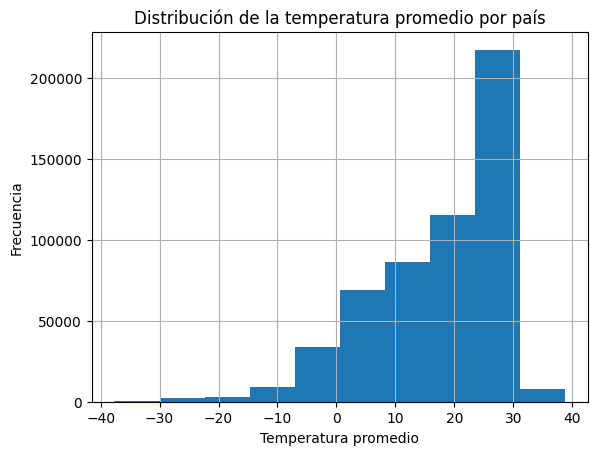

In [ ]:
# Estadísticas descriptivas de las variables numéricas
print(df.describe())

# Distribución de la temperatura promedio por país
df['AverageTemperature'].hist()
plt.xlabel('Temperatura promedio')
plt.ylabel('Frecuencia')
plt.title('Distribución de la temperatura promedio por país')
plt.show()






1.   Se utiliza df.describe() para obtener estadísticas descriptivas de las variables numéricas del DataFrame, como media, mediana, desviación estándar, valores máximo y mínimo.

2.   Se crea un histograma para visualizar la distribución de la temperatura promedio por país. Esto permite observar la forma de la distribución y la existencia de posibles valores atípicos.



Identificar variables categóricas



In [ ]:
# Identificar variables categóricas
print(df.select_dtypes(include='object').columns)

Index(['dt', 'Country'], dtype='object')


1.   Se utiliza df.select_dtypes(include='object') para identificar las variables del DataFrame que son de tipo categórico (object).



Analizar variables categóricas

Country
Åland                                  3239
Faroe Islands                          3239
Greece                                 3239
Germany                                3239
Saint Pierre And Miquelon              3239
                                       ... 
Northern Mariana Islands               1329
Guam                                   1329
Heard Island And Mcdonald Islands       788
French Southern And Antarctic Lands     788
Antarctica                              764
Name: count, Length: 243, dtype: int64


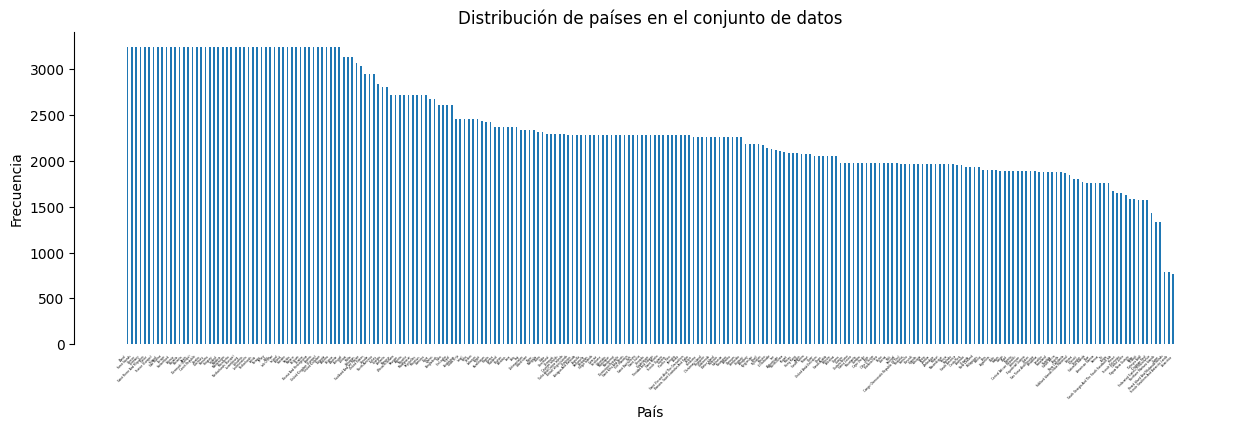

In [ ]:
# Distribución de frecuencias por país
print(df['Country'].value_counts())

# Ajustar ancho de figura al máximo
plt.figure(figsize=(plt.rcParams['figure.figsize'][0]*2, plt.rcParams['figure.figsize'][1]))  # Duplicar ancho

# Gráfico de barras
paises = df['Country'].value_counts()
plt.bar(paises.index, paises.values, width=0.4)  # Ajustar ancho de barras si se desea

# Ajustar márgenes y bordes
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(bottom=False)

# Ejes y título
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.title('Distribución de países en el conjunto de datos')

# Minimizar el tamaño de la fuente de los nombres de países
plt.xticks(fontsize=2)  # Ajustar el tamaño de la fuente a un valor mínimo

# Rotación de nombres de países (opcional)
plt.xticks(rotation=45, ha='right')  # Ajustar rotación y alineación

# Ajustar espacio entre barras (opcional)
plt.subplots_adjust(bottom=0.3)  # Ajustar margen inferior para mayor espacio

plt.show()

1.   Se obtiene la distribución de frecuencias por país utilizando df['Country'].value_counts(). Esto permite observar la cantidad de registros para cada país.

2.   Se crea un gráfico de barras para visualizar la distribución de países.



En esta etapa inicial de exploración de datos, se ha logrado:

*   Familiarizarse con la estructura del dataset: Se ha identificado el número de filas, columnas, tipos de datos y la presencia de valores nulos.
*   Analizar las variables numéricas: Se han obtenido medidas de tendencia central, dispersión y forma de la distribución para la temperatura promedio.
*   Identificar y analizar las variables categóricas: Se ha determinado la distribución de frecuencias por país, permitiendo observar la cantidad de registros para cada uno.





### **Detección y manejo de valores faltantes**

Verificar la presencia de valores faltantes

In [ ]:
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

1.   Se verifica la presencia de valores faltantes (df.isnull().sum()) para cada columna.



Imputar valores faltantes con la mediana

In [ ]:
# Seleccionar las columnas con valores de temperatura
temperature_columns = ['AverageTemperature', 'AverageTemperatureUncertainty']

# Imputación por la mediana para todas las columnas con valores faltantes
for col in temperature_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

1.   Se identifican las columnas con valores faltantes y se imputan por la mediana todas las columnas con valores faltantes.

Verificación final de valores faltantes

In [ ]:
# Verificar si quedan valores faltantes
print(df.isnull().sum())

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64


1.   Se verifica que no queden valores faltantes en el conjunto de datos después de la imputación.



Convertir tipos de datos

In [ ]:
# Convertir la columna 'dt' a formato de fecha
df['dt'] = pd.to_datetime(df['dt'])

Verificar los tipos de datos actuales

In [ ]:
df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
dtype: object

Guardado del conjunto de datos limpio

In [ ]:
# Guardar el conjunto de datos limpio
df.to_csv("GlobalLandTemperaturesByCountry_clean.csv", index=True)

1.   Se guarda el conjunto de datos limpio en un nuevo archivo CSV para su posterior uso en análisis o modelado.

### **Análisis de tendencias a lo largo del tiempo**

Carga del conjunto de datos limpio

In [ ]:
# Carga del conjunto de datos limpio
df = pd.read_csv("GlobalLandTemperaturesByCountry_clean.csv")

# Verificación de datos de las columnas
print(df.head())

   Unnamed: 0          dt  AverageTemperature  AverageTemperatureUncertainty  \
0           0  1743-11-01               4.384                          2.294   
1           1  1743-12-01              20.901                          0.571   
2           2  1744-01-01              20.901                          0.571   
3           3  1744-02-01              20.901                          0.571   
4           4  1744-03-01              20.901                          0.571   

  Country  
0   Åland  
1   Åland  
2   Åland  
3   Åland  
4   Åland  


Se utiliza pd.read_csv() para cargar el archivo CSV

1.   Se utiliza pd.read_csv() para cargar el archivo CSV "GlobalLandTemperaturesByCountry_clean.csv" en un DataFrame llamado df.

Análisis de la evolución de la temperatura promedio por país

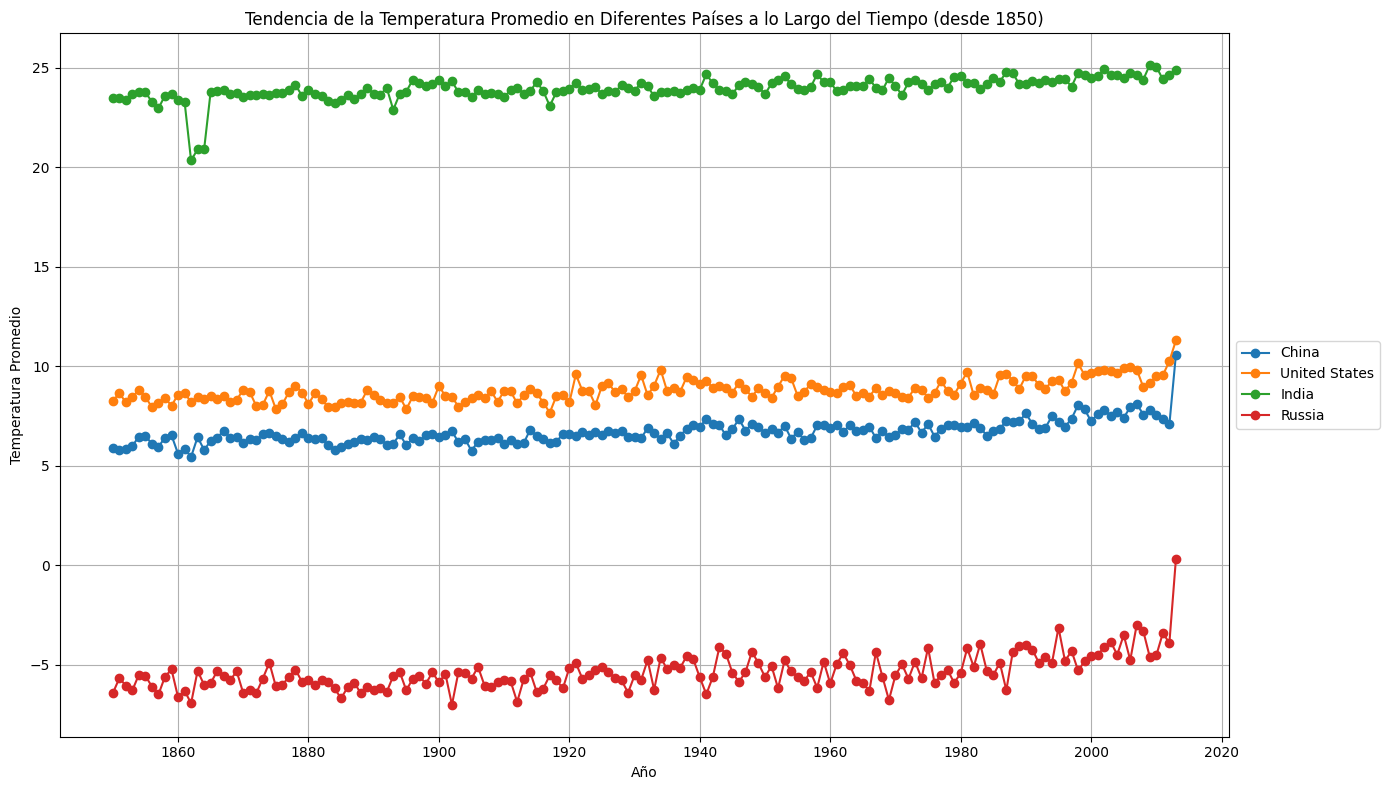

In [ ]:
# Convertir la columna 'dt' a datetime
df['dt'] = pd.to_datetime(df['dt'])

# Filtrar el DataFrame para incluir solo los datos a partir del año 1850
df_filtered = df[df['dt'].dt.year >= 1850]

# Agrupar los datos por país y año, calculando la temperatura promedio
country_yearly_avg_temp = df_filtered.groupby(['Country', df_filtered['dt'].dt.year])['AverageTemperature'].mean().unstack()

# Seleccionar algunos países para el análisis
selected_countries = ['China', 'United States', 'India', 'Russia']

# Crear el gráfico de líneas para cada país seleccionado
plt.figure(figsize=(14, 8))
for country in selected_countries:
    plt.plot(country_yearly_avg_temp.loc[country], label=country, marker='o')

# Añadir etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Temperatura Promedio')
plt.title('Tendencia de la Temperatura Promedio en Diferentes Países a lo Largo del Tiempo (desde 1850)')

# Ajustar la leyenda para que no se sobreponga con las líneas
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar rejilla y ajustar el diseño
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

1.   Filtrado de datos

  *   Se utiliza la condición df['dt'].dt.year >= 1850 para filtrar el DataFrame original (df) y conservar solo los datos a partir del año 1850.
  *   El resultado es un nuevo DataFrame (df_filtered) con la información de temperatura promedio anual a partir de 1850.


2.   Cálculo de la temperatura promedio anual por país y año
  *   Se agrupa el DataFrame filtrado (df_filtered) por país (Country) y año (dt.year).
  *   Se calcula la temperatura promedio anual para cada grupo utilizando la función mean().
  *   El resultado es un DataFrame multiíndice (country_yearly_avg_temp) que muestra la temperatura promedio anual para cada país en cada año desde 1850.


3.   Selección de países para el análisis
  *   Se define una lista selected_countries con los nombres de los países que se desea analizar ('China', 'United States', 'India', 'Russia').

El gráfico de líneas muestra la evolución de la temperatura promedio anual para los países seleccionados ('China', 'United States', 'India', 'Russia') desde 1850 hasta el último año disponible en los datos.

  *   Se puede observar una tendencia general al aumento de la temperatura promedio anual en todos los países seleccionados.
  *   La pendiente de la línea indica la tasa de aumento de la temperatura promedio anual para cada país.

Identificación de patrones y tendencias en la temperatura promedio anual con Análisis de Componentes Principales (PCA)

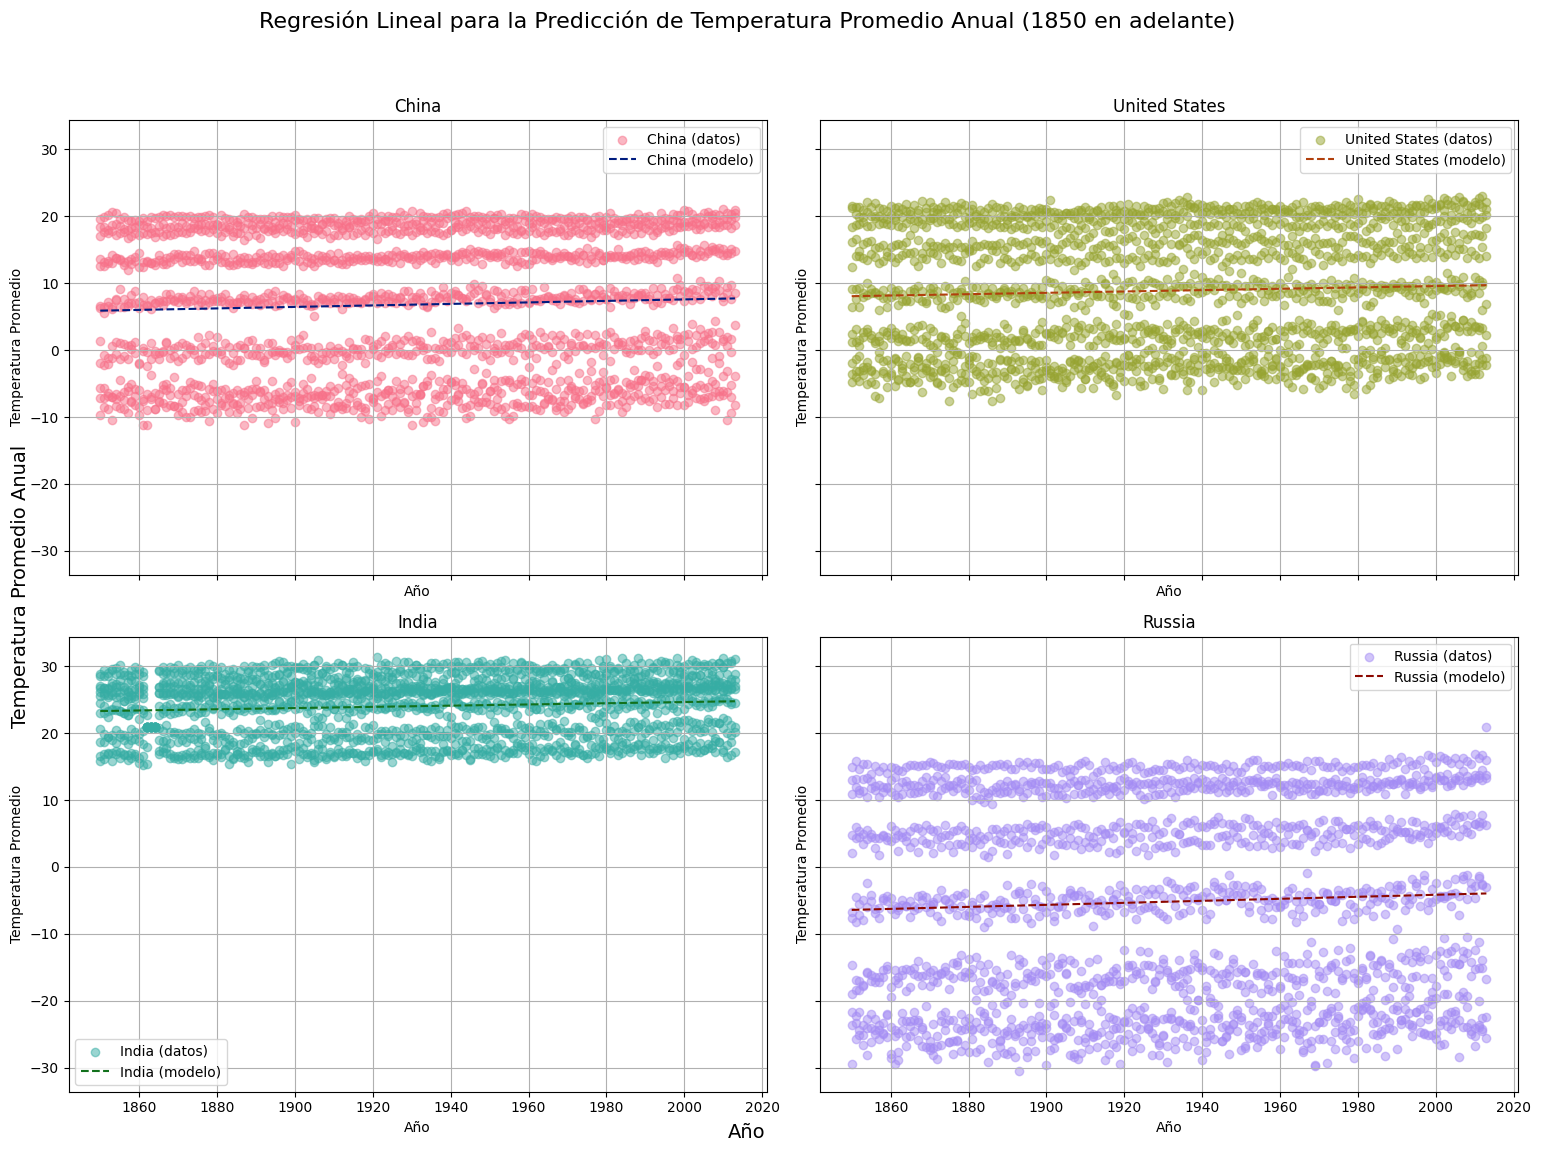

Predicciones para 2025:
         Country  Year  AverageTemperature
0          China  2025            7.865057
1  United States  2025            9.830488
2          India  2025           24.872117
3         Russia  2025           -3.777567


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Filtrar el DataFrame para incluir solo los datos a partir del año 1850
df_filtered = df[df['dt'].dt.year >= 1850]

# Seleccionar los países de interés
selected_countries = ['China', 'United States', 'India', 'Russia']

# Crear un DataFrame para almacenar las predicciones
prediction_df = pd.DataFrame(columns=['Country', 'Year', 'AverageTemperature'])

# Crear subgráficos para cada país
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True, sharey=True)
axes = axes.flatten()

# Lista de colores para los países
data_colors = sns.color_palette("husl", len(selected_countries))
model_colors = sns.color_palette("dark", len(selected_countries))  # Paleta de colores más oscuros para los modelos

# Loop a través de cada país
for i, country in enumerate(selected_countries):
    # Filtrar los datos por país
    df_country = df_filtered[df_filtered['Country'] == country]

    # Extraer características y etiquetas
    X = df_country['dt'].dt.year.values.reshape(-1, 1)  # Año como característica
    y = df_country['AverageTemperature'].values  # Temperatura promedio anual como etiqueta

    # División de los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Creación y entrenamiento del modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicción para el año 2025
    pred_2025 = model.predict([[2025]])

    # Crear un DataFrame con la predicción para el año 2025
    temp_df = pd.DataFrame({
        'Country': [country],
        'Year': [2025],
        'AverageTemperature': [pred_2025[0]]
    })

    # Añadir la predicción al DataFrame
    prediction_df = pd.concat([prediction_df, temp_df], ignore_index=True)

    # Plotear datos y modelo en el subgráfico correspondiente
    axes[i].scatter(X, y, label=f'{country} (datos)', alpha=0.5, color=data_colors[i])
    axes[i].plot(X, model.predict(X), label=f'{country} (modelo)', linestyle='--', color=model_colors[i])
    axes[i].set_title(country)
    axes[i].legend()
    axes[i].grid(True)
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel('Temperatura Promedio')

# Añadir etiquetas y título al gráfico
fig.suptitle('Regresión Lineal para la Predicción de Temperatura Promedio Anual (1850 en adelante)', fontsize=16)
fig.text(0.5, 0.04, 'Año', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Temperatura Promedio Anual', va='center', rotation='vertical', fontsize=14)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])

# Mostrar el gráfico
plt.show()

# Imprimir la tabla con las predicciones
print("Predicciones para 2025:")
print(prediction_df)

1. Creación de un DataFrame para las predicciones
  *   Se crea un DataFrame vacío (prediction_df) para almacenar las predicciones de temperatura promedio anual para el año 2025.


2. Iteración por cada país
  *   Se filtra el DataFrame (df_country) con los datos del país actual.
  *   Se extraen las características (X) y las etiquetas (y) para el modelo de regresión lineal.
  *   Se dividen los datos en conjuntos de entrenamiento (X_train, y_train) y prueba (X_test, y_test).
  *   Se crea y entrena un modelo de regresión lineal (model).
  *   Se predice la temperatura promedio anual para el año 2025 (pred_2025).
  *   Se crea un DataFrame temporal (temp_df) con la información del país, el año 2025 y la predicción de temperatura.
  *   Se añade el DataFrame temporal al DataFrame de predicciones (prediction_df).
  *   Se crea un diagrama de dispersión para los datos reales (scatter) y una línea para las predicciones del modelo (plot).


Se realiza una predicción de la temperatura promedio anual para el año 2025 en los países seleccionados, utilizando un modelo de regresión lineal y visualizando los resultados en subgráficos.

## **Conclusiones**

Implicaciones y consideraciones:

*   El aumento observado en la temperatura promedio anual en los países seleccionados es una señal del cambio climático.

*   Las predicciones de temperatura promedio anual para el año 2025 indican que el calentamiento global continuará en el futuro.


Limitaciones y direcciones futuras:

*   Este análisis se ha realizado utilizando un conjunto de datos específico de temperaturas terrestres globales por país.

*   Sería necesario ampliar el análisis a otros conjuntos de datos y regiones para obtener una visión más completa del cambio climático.

*   Se podrían explorar otros métodos de análisis y modelado para mejorar la precisión de las predicciones.

*   Es importante considerar la incertidumbre en los datos y en las predicciones.

En general, este proyecto ha proporcionado una visión general del cambio climático en los países seleccionados, utilizando técnicas de análisis de datos y modelado estadístico. Los resultados destacan la importancia de tomar medidas para mitigar el cambio climático y proteger el medio ambiente.